# Contents
- Importing libraries and data
- The elbow technique
- k-means clustering

# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This ensures the graphs created are displayed notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#import df
path = r'C:\Users\kesmc\Documents\2023 Bouldering Analysis'
boulder=pd.read_pickle(os.path.join(path, 'Data', 'boulder_data_clean_2.pkl'))

In [4]:
boulder.head()

,Competition Title,Competition Date,Full Name,Nation,Start Number,Rank,Gender,Qualification,Semifinal,Final
0,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Janja Garnbret,SLO,2,1,F,5.5,3.4,4.4
1,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Akiyo Noguchi,JPN,1,2,F,5.5,3.4,3.4
2,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Fanny Gibert,FRA,3,3,F,2.4,4.4,2.4
3,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Miho Nonaka,JPN,4,4,F,5.5,2.4,2.4
4,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Luce Douady,FRA,50,5,F,5.5,2.4,1.4


In [6]:
# remove non numerical data
boulder2=boulder[['Rank', 'Qualification', 'Semifinal', "Final"]]

In [7]:
boulder2.head()

,Rank,Qualification,Semifinal,Final
0,1,5.5,3.4,4.4
1,2,5.5,3.4,3.4
2,3,2.4,4.4,2.4
3,4,5.5,2.4,2.4
4,5,5.5,2.4,1.4


In [20]:
boulder2=boulder2.fillna(0)

In [21]:
# Check for NaN
boulder2.value_counts(dropna=False)

Rank  Qualification  Semifinal  Final
31    2.4            0.0        0.0      14
43    1.3            0.0        0.0      14
83    0.1            0.0        0.0      14
88    0.0            0.0        0.0      13
39    2.3            0.0        0.0      13
                                         ..
16    4.5            0.4        0.0       1
                     1.1        0.0       1
                     1.3        0.0       1
                     2.4        0.0       1
33    2.2            0.0        0.0       1
Length: 1023, dtype: int64

In [13]:
# check data types
boulder2.dtypes

Rank               int64
Qualification    float64
Semifinal        float64
Final            float64
dtype: object

# The Elbow Technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
score = [kmeans[i].fit(boulder2).score(boulder2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

C:\Users\kesmc\Documents\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


[-2002229.0724441584,
 -553681.3239335932,
 -262443.1398189012,
 -156241.18094722164,
 -105534.39619119436,
 -74395.67927296716,
 -54835.58801869981,
 -42431.27606748621,
 -34871.637659409]

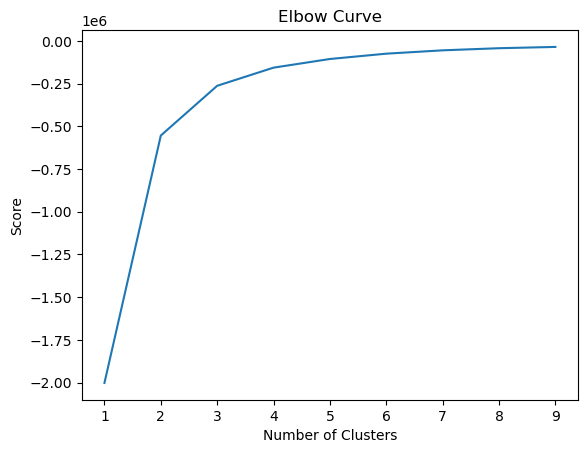

In [23]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Optimal Number of clusters: 3
Reason for choice: After 3 the curve straightens out. 4 is still defined but not a large jump.

# k-means clustering

In [25]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [26]:
# Fit the k-means object to the data.
kmeans.fit(boulder2)

KMeans(n_clusters=3)

In [27]:
boulder2['clusters'] = kmeans.fit_predict(boulder2)

In [28]:
boulder2.head()

,Rank,Qualification,Semifinal,Final,clusters
0,1,5.5,3.4,4.4,1
1,2,5.5,3.4,3.4,1
2,3,2.4,4.4,2.4,1
3,4,5.5,2.4,2.4,1
4,5,5.5,2.4,1.4,1


In [29]:
boulder2['clusters'].value_counts()

1    884
2    809
0    635
Name: clusters, dtype: int64

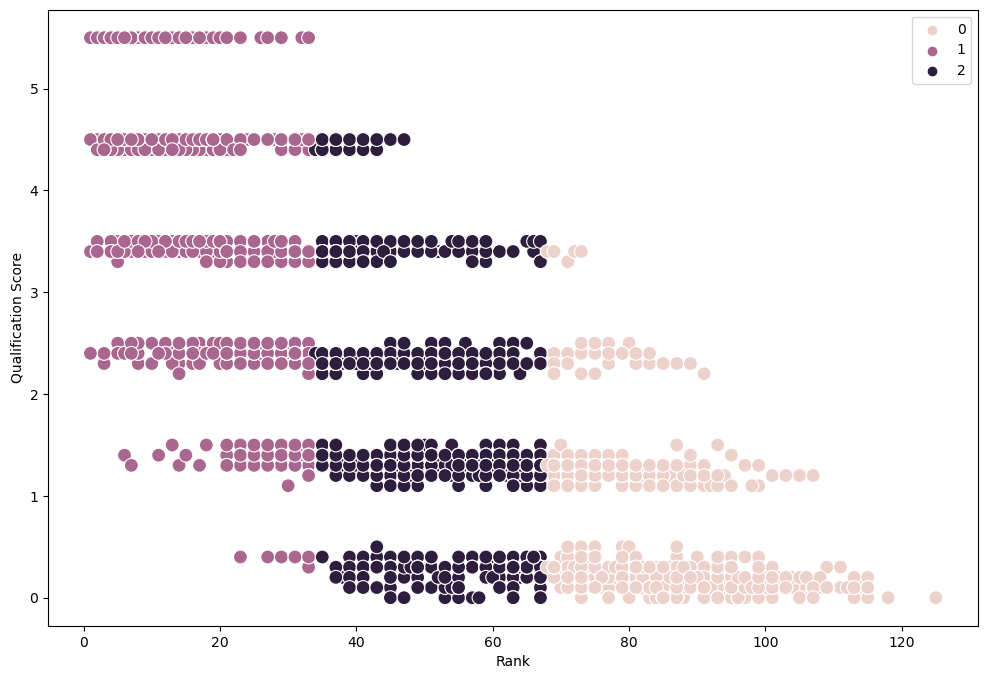

In [32]:
# Plot the clusters for the "Rank" and "Qualification" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=boulder2['Rank'], y=boulder2['Qualification'], hue=kmeans.labels_, s=100) 
# Subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rank') # Label x-axis.
plt.ylabel('Qualification Score') # Label y-axis.
plt.show()

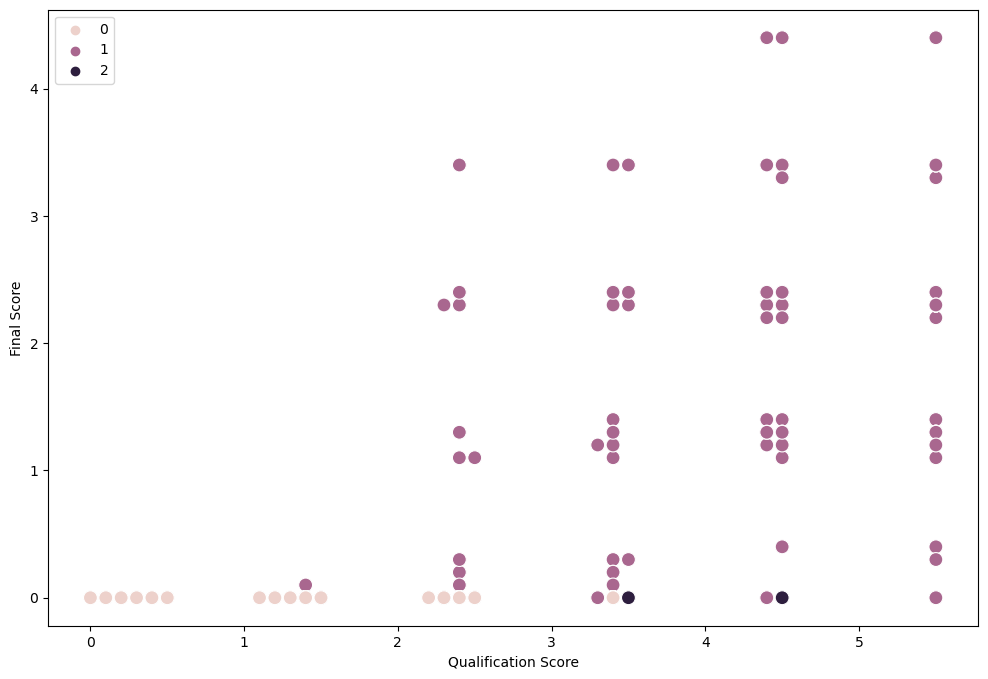

In [33]:
# Plot the clusters for the "Qualification" and "Final" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=boulder2['Qualification'], y=boulder2['Final'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Qualification Score') 
plt.ylabel('Final Score') 
plt.show()

In [37]:
boulder2.loc[boulder2['clusters'] == 2, 'cluster'] = 'dark purple'
boulder2.loc[boulder2['clusters'] == 1, 'cluster'] = 'purple'
boulder2.loc[boulder2['clusters'] == 0, 'cluster'] = 'pink'

In [38]:
boulder2.groupby('cluster').agg({'Rank':['mean', 'median'], 
                         'Qualification':['mean', 'median'], 
                         'Semifinal':['mean', 'median'],
                          'Final':['mean', 'median']})

Rank        Qualification        Semifinal           Final  \
                  mean median          mean median      mean median     mean   
cluster                                                                        
dark purple  50.066749   49.0      1.677256    1.4   0.00000    0.0  0.00000   
pink         85.588976   83.0      0.506614    0.2   0.00000    0.0  0.00000   
purple       17.235294   17.0      3.674774    3.5   0.98224    0.2  0.43043   

                    
            median  
cluster             
dark purple    0.0  
pink           0.0  
purple         0.0

What could these results be useful for in future steps?
These results break down nicely the what might be considered the top performers, average performers, and lowest performers. In task 6.2 I manually broke it down and created a scatterplot with 4 categories, but it may have been better to use these three categories instead. I could then do more with these three categories to help look into other trends.